In [1]:
from matplotlib import pyplot as plt
import numpy as np
import dill
import matplotlib as mpl

In [2]:
plt.style.use("/home/kjeong/.config/matplotlib/custom.mplstyle")
plt.rcParams["text.latex.preamble"] = r'\usepackage{siunitx}\sisetup{detect-all}\usepackage{cmbright}'#\usepackage{sansmath}\sansmath
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["font.sans-serif"] = 'cmbright'

In [3]:
workdir = "/project/dinner/kjeong/insulin/pipeline/step7_5ns"
ntraj = 28*28*24
length = 1000

k_ls = [100, 200, 400, 600]+[1000, 1500, 2000, 3000]
rn_ls = [0, 1, 2]
lag_ls = [100, 200, 400, 600, 800, 900]
div_ls = [1, 4, 2, -4]

with open(f"{workdir}/step2_k_div/qf_unq.npy", "rb") as f:
    qf_unq = dill.load(f)
with open(f"{workdir}/step2_k_div/qf_unq_hk.npy", "rb") as f:
    qf_unq_hk = dill.load(f)
qf_unq = qf_unq+qf_unq_hk

In [4]:
k_choice = [1, 3, 6]
lag_choice = [0, 1, 2, 3, 4]

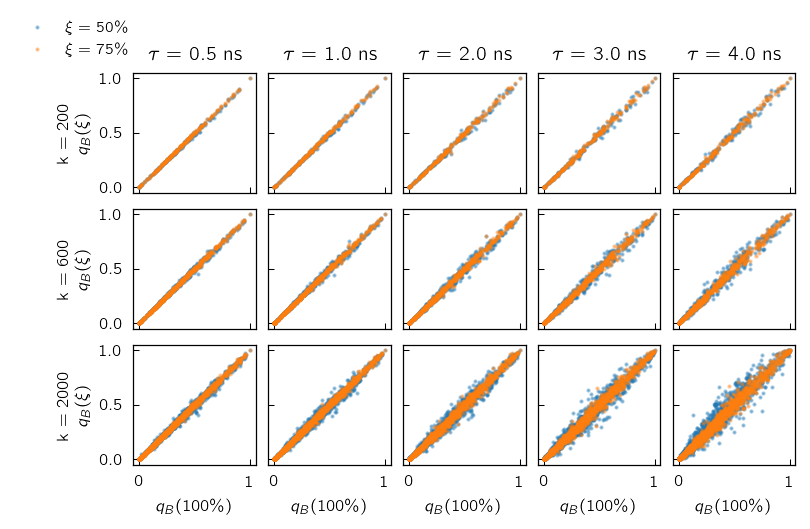

In [6]:
#qf_unq[i_k][i_rn, i_lag, i_div]
i_rn = 0 #for i_rn in rn_ls:
nrow, ncol = len(k_choice), len(lag_choice)
#fig_width = 6
#fig_height = nrow*fig_width/ncol
fig_width = 5#4.4
fig_height = 3.2#2.8
fig, axs = plt.subplots(nrow, ncol, figsize=(fig_width, fig_height), sharex=True, sharey=True, constrained_layout=True)
for i_k, (k_id, k) in enumerate(zip(k_choice, np.array(k_ls)[k_choice])):
    axs[i_k, 0].set_ylabel(f"k = {k}\n"+r"$q_B(\xi)$")
    for i_lag, lag in enumerate(np.array(lag_ls)[lag_choice]):
        if i_k == 0:
            axs[0, i_lag].set_title(r"$\\\tau =\ $"+f"{0.005*lag:.1f} ns")
        if i_k == nrow-1:
            axs[i_k, i_lag].set_xlabel(f"$q_B(100\%)$")
        #for i_div, amount in enumerate([75, 50], 1):
        for i_div, amount in zip([2, 1], [50, 75]):
            if i_k==0 and i_lag==0:
                axs[i_k, i_lag].plot(qf_unq[k_id][i_rn, i_lag, 0], qf_unq[k_id][i_rn, i_lag, i_div], '.', alpha=0.4, label=r"$\xi=\ $"+f"{amount}"+r"$\%$")
                #axs[i_k, i_lag].legend(fontsize=6)
            else:
                axs[i_k, i_lag].plot(qf_unq[k_id][i_rn, i_lag, 0], qf_unq[k_id][i_rn, i_lag, i_div], '.', alpha=0.4)

lgd=fig.legend(bbox_to_anchor=(-1.98, 1.02, 2.1, 0.05), bbox_transform=fig.transFigure, ncol=1,fontsize=7.5)
#plt.savefig(f"{workdir}/figure/step2_scatter_cm2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [7]:
#qf_unq[i_k][i_rn, i_lag, i_div]
worst_ls = [100, 25, 5] #[1, 10, 20, 50] #
mae_q = np.zeros((len(k_ls), 1, len(lag_ls), len(div_ls)-1, len(worst_ls)))
#for i_rn in rn_ls:
i_rn = 0 
for i_div, amount in enumerate([75, 50, 25], 1):
    for i_k, k in enumerate(k_ls):
        for i_lag, lag in enumerate(lag_ls):
            for i_w, percent in enumerate(worst_ls):
                mae_q[i_k, 0, i_lag, i_div-1, i_w] = np.mean(np.sort(np.abs(qf_unq[i_k][i_rn, i_lag, 0]-qf_unq[i_k][i_rn, i_lag, i_div]))[-int(k*(percent/100)):])

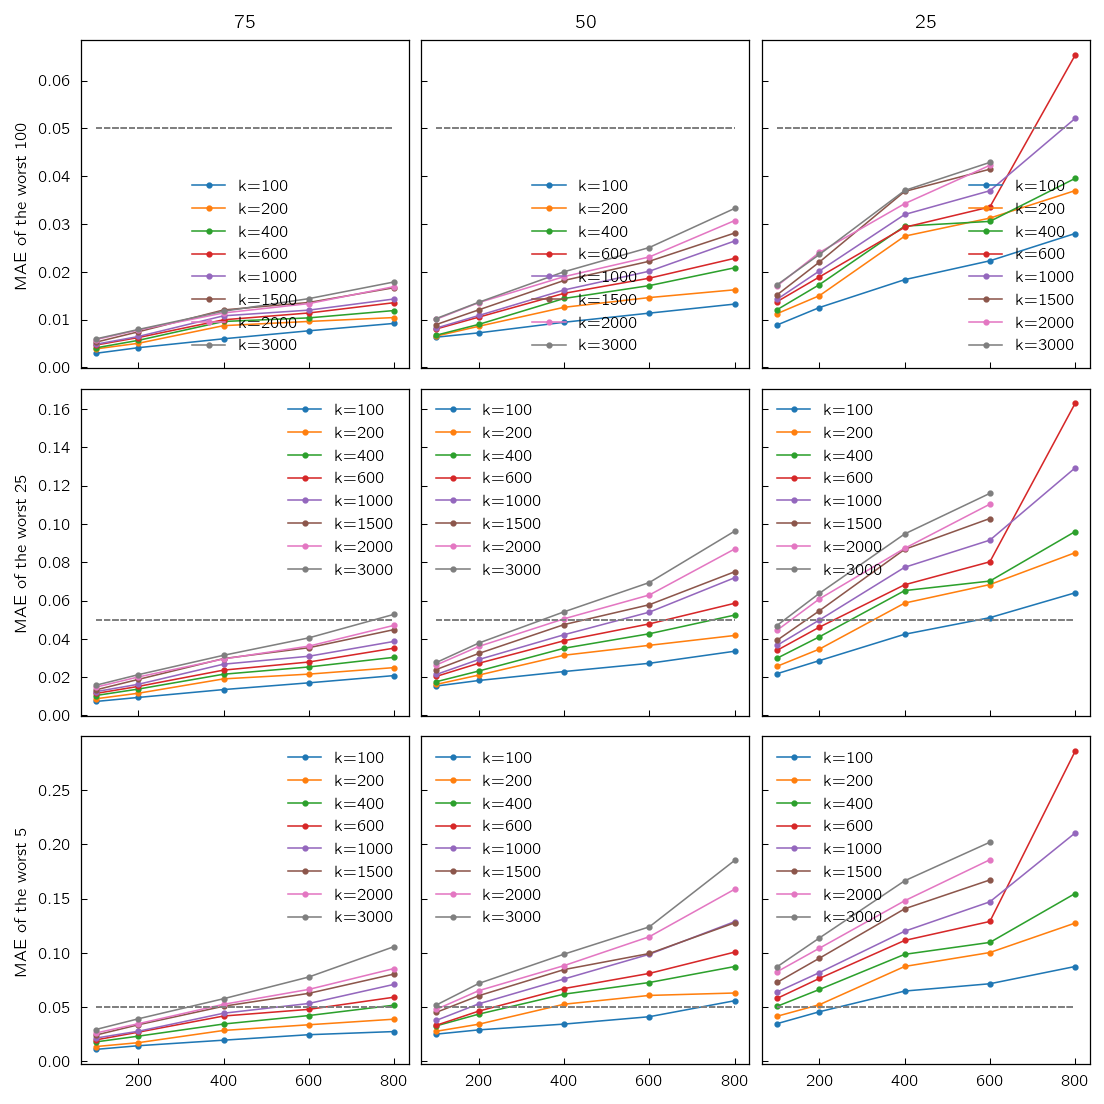

In [8]:
#qf_unq[i_k][i_rn, i_lag, i_div]
i_rn = 0 
nrow, ncol = len(worst_ls), 3
fig_width = 7.25
fig_height = nrow*fig_width/ncol
fig, axs = plt.subplots(nrow, ncol, figsize=(fig_width, fig_height), sharex=True, sharey="row", constrained_layout=True)
for i_w, percent in enumerate(worst_ls):
    ax = axs[i_w]
    for i_div, amount in enumerate([75, 50, 25], 1):
        if i_w==0:
            ax[i_div-1].set_title(f"{amount} % data")#, fontsize=15)
        for i_k, k in enumerate(k_ls):
            ax[i_div-1].plot(np.array(lag_ls)[lag_choice], mae_q[i_k, 0, lag_choice, i_div-1, i_w], "-o", label=f"k={k}")
            ax[i_div-1].plot(np.array(lag_ls)[lag_choice], 0.05*np.ones(len(lag_choice)), "--", color="gray")
            ax[i_div-1].legend()
    axs[i_w, 0].set_ylabel(f"MAE of the worst {percent}% $q_+$")
        

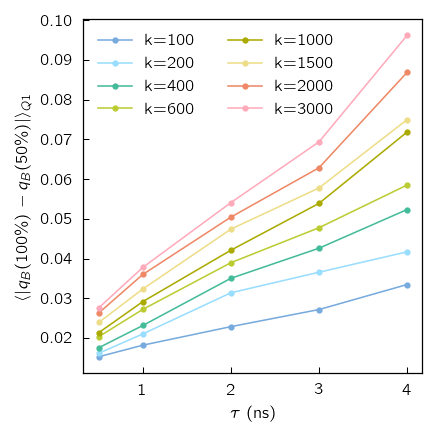

In [10]:
color_tmp = ["#77AADD", "#99DDFF", "#44BB99", "#BBCC33", "#AAAA00", "#EEDD88", "#EE8866", "#FFAABB"]
fig, ax = plt.subplots(1, 1, figsize=(2.8, 2.8), constrained_layout=True)
i_w, percent = 1, 25
i_div, amount = 2, 50 #1, 75
for i_k, k in enumerate(k_ls):
    ax.plot(0.005*np.array(lag_ls)[lag_choice], mae_q[i_k, 0, lag_choice, i_div-1, i_w], "-o", label=f"k={k}", color = color_tmp[i_k])
    #ax.axhline(0.05, zorder=0, color="black", linestyle="--")
    ax.legend(fontsize=8, ncol=2)
#lgd=fig.legend(bbox_to_anchor=(-1.98, 1.02, 2.1, 0.05), bbox_transform=fig.transFigure, ncol=4,fontsize=7.5)

ax.set_ylabel(r"$\langle \vert q_B(100 \%) - q_B(50 \%) \vert \rangle_{Q1}$")
ax.set_xlabel(r"$\\\tau$ (ns)")
#plt.savefig(f"{workdir}/figure/step2_k_div_cm2.pdf")